In [1]:
import keras # notre boite à outils
from keras.models import Sequential # permet d'initier un type de modèle la ou les couches peuvent etre ajouté un par un
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten  # les types de couches qu'on va utiliser
import numpy as np  # une libraire qui permet de stocker les tableaux d'une manière optimisée
from keras.utils.np_utils import to_categorical # pour convertir les labels en proba (les adapter à la sortie du modèle)
import cv2  # permet la lecture des images et l'ecriture
from glob import glob  # pour la lecture de fichiers existant dans un dossier

###La préparation des données:

In [3]:
images = []
labels  = []
noms_pokemons = []

dossiers_pokemons = glob("data/train/Pokemon5/*")

for dossier in dossiers_pokemons:
  # recupere le nom du pokemon
  nom_pokemon = dossier.replace("\\","/").split("/")[3]
  noms_pokemons.append(nom_pokemon)

  noms_images = glob(dossier+"/*")
  print("chargement des images de :",nom_pokemon)
  for nom in noms_images:
    image = cv2.imread(nom,cv2.IMREAD_COLOR)
    image = cv2.resize(image,(108,108)) # (108x108 ) correspond à la taille de l'image la plus petit dans BDD
    image = image/255

    images.append(image)
    labels.append(noms_pokemons.index(nom_pokemon))

images = np.array(images) # on convertit nos tableau en numpy (pour qu'ils seront plus optimisés)
labels = np.array(labels)
labels = to_categorical(labels)

chargement des images de : Dracaufeu
chargement des images de : Ectoplasma
chargement des images de : Evoli
chargement des images de : Mewtwo
chargement des images de : Pikachu


## Le Modèle:

In [4]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation="relu" , input_shape=(108,108,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 , kernel_size=(5,5) , activation="relu"))
model.add(Conv2D(64 , kernel_size=(3,3) , activation="relu"))
model.add(Conv2D(64 , kernel_size=(3,3) , activation="relu"))
model.add(Conv2D(64 , kernel_size=(3,3) , activation="relu"))
model.add(Flatten())
model.add(Dense(5,activation="softmax"))
model.trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 106, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 118336)            0

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
history = model.fit(images,labels, epochs=20, validation_split= 0.1, shuffle = True)

Epoch 1/20
7/7 [==============================] - 24s 565ms/step - loss: 2.1532 - accuracy: 0.2174 - val_loss: 1.2184 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 101ms/step - loss: 1.3177 - accuracy: 0.4339 - val_loss: 1.4545 - val_accuracy: 0.3333
Epoch 3/20
7/7 [==============================] - 1s 98ms/step - loss: 0.9884 - accuracy: 0.5652 - val_loss: 1.2527 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 1s 97ms/step - loss: 0.5228 - accuracy: 0.7666 - val_loss: 0.6346 - val_accuracy: 0.7917
Epoch 5/20
7/7 [==============================] - 1s 97ms/step - loss: 0.3816 - accuracy: 0.8527 - val_loss: 0.0738 - val_accuracy: 0.9583
Epoch 6/20
7/7 [==============================] - 1s 96ms/step - loss: 0.2998 - accuracy: 0.8742 - val_loss: 0.0706 - val_accuracy: 0.9583
Epoch 7/20
7/7 [==============================] - 1s 97ms/step - loss: 0.2106 - accuracy: 0.9327 - val_loss: 0.7644 - val_accuracy: 0.8750
Epoch 8/20
7/7 [========

## Ploting the loss and accuracy curves:

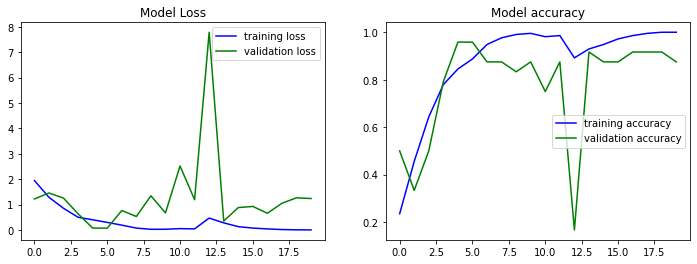

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2 , figsize=(12,4))
ax[0].plot(history.history["loss"],color = "blue" , label="training loss")
ax[0].plot(history.history["val_loss"],color = "green" , label="validation loss")
ax[0].set_title("Model Loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"],color = "blue" , label="training accuracy")
ax[1].plot(history.history["val_accuracy"],color = "green" , label="validation accuracy")
ax[1].set_title("Model accuracy")
ax[1].legend()
plt.show()

## Etape 4 : Sauvegarde du modele

In [7]:
import h5py
model.save("outputs/cnn_pokemons.h5")

## Etape 5 : Utilisation du modèle:

4
Le pokémon dans l'image est :  Pikachu


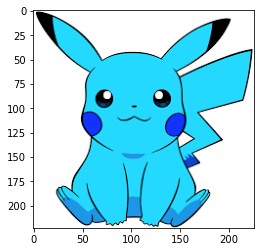

In [8]:
image = cv2.imread("data/test/image.png",cv2.IMREAD_COLOR)
plt.imshow(image,cmap="gray")

image = cv2.resize(image, (108,108) ) 
image = image/255

image = image.reshape(1,108,108,3)
prediction = model.predict(image)
label = np.argmax(prediction)
print(label)
print("Le pokémon dans l'image est : ",noms_pokemons[label])